# Darstellung von H(s) in der Laplace-Ebene
Signale:
1. **RC-Glied** aus der GSV-Vorlesung: $H\left(s\right)=\frac{1}{1+0\ldotp 4s}$
2. **Eigene Übertragungsfunktion**. Nach Eingabe bitte 'Enter' drücken (Achtung: Kein Error-Check!)



Output()

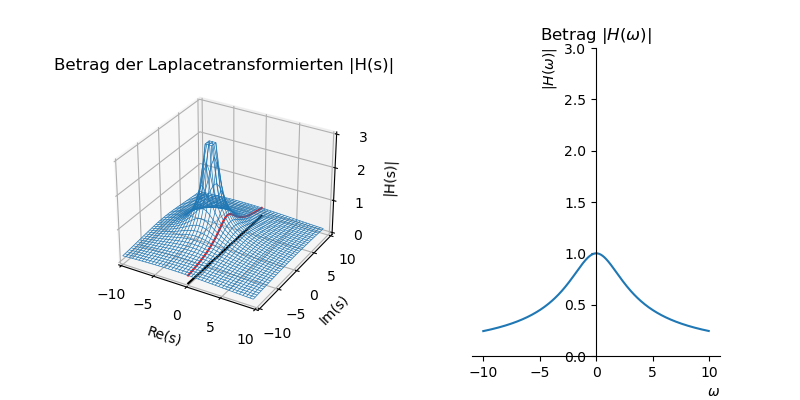

In [4]:
"""
z-Trafo-Demoscript (Matlab-Style)

(c) Benno Dömer | HS Pforzheim 2022 

"""
%matplotlib widget 

from numpy import (pi, meshgrid, exp, sqrt, sin, cos, tan, angle, arange, linspace, zeros, ones, NaN, real, imag) # numpy für's Rechnen, bei Bedarf anpassen
from numpy.fft import fft
from matplotlib.pyplot import (figure, plot, stem, legend, text, subplots_adjust,  
                               grid, xlabel, ylabel, subplot, subplots, title, clf, cla, xlim, ylim) # matpotlib für's  Plotten, bei Bedarf anpassen
from matplotlib.pyplot import fill_between as area # Beispiel für eine Mapping auf Matlab-Bezeichnung
import ipywidgets as widgets # interaktive Controls wie Slider, Dropdowns etc.
from matplotlib import cm

import numpy as np
np.seterr(divide='ignore', invalid='ignore')

def myplotstyle(ax): # Hilfsfunktion, hübscht den Plot etwas auf
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

hmax = 3; # höhe, ab der für den Plot gekappt wird
amax = 10; # re- und im-Achse werden bis zu +-a berechnet
astep = 0.5; # schrittweite
a_r = arange(-amax,amax,astep); # Achsen/Grid, reele Achse
a_i = arange(-amax,amax,astep); # Achsen/Grid, imaginäre Achse
#omega = arange(0,1,0.005)*2*pi;
#z_ek = exp(1j*omega);

[sr,si] = meshgrid(a_r,a_i);
s = sr+1j*si; # komplexes Grid aufstellen 


#fig = figure(figsize=(7, 4),  layout='constrained', dpi=100,num=' ')
fig = figure(figsize=(8, 4), dpi=100,num=' ')

def plotdata(sigc, sigtxt, ek_only):
    if sigc == 0: 
        h = lambda s:  1/(1+0.4*s); # H(z) RC-Glied aus VL, als Funktionshandle
    else:
        h = eval('lambda s:' + sigtxt.replace('^','**'))

    abs_h = abs(h(s)); # Betrag bilden
    abs_h[abs_h>hmax]=hmax; # Werte > hmax kappen

    if ek_only:
        abs_h[real(s)>0]=NaN; # am Einheitskreis schneiden
    omega = arange(-amax,amax,astep);
    abs_h_ek = abs(h(1j*omega)); 
    abs_h_ek[abs_h_ek>hmax]=NaN; #% Werte > hmax kappen
    clf()
    ax1 = fig.add_subplot(1, 2,1,projection='3d')
    ax1.plot_wireframe(sr,si,abs_h,linewidth=0.5)#,'FaceAlpha','0.5'); # abs(h(z)) plotten
    ax1.plot(zeros(len(omega)),omega,zs=0, zdir='z',color='k')#,real(z_ek),imag(z_ek),abs_h_ek,'b'); # Einheitskreis und h(z) am Einheitskreis plotten
    ax1.plot(zeros(len(omega)),omega,abs_h_ek,color='r')#,real(z_ek),imag(z_ek),abs_h_ek,'b'); # Einheitskreis und h(z) am Einheitskreis plotten
    ax1.set_zlabel('|H(s)|')
    
    xlim(-amax,amax)
    ylim(-amax,amax)
    xlabel('Re(s)')
    ylabel('Im(s)')
    title('Betrag der Laplacetransformierten |H(s)|')

    ax2 = fig.add_subplot(1, 2, 2)
    omega_sym = arange(-amax,amax,0.05) # symmetrische X-Achse für gewohnte Darstellung
    abs_h_omega = abs(h(1j*omega_sym)); # h für e^jw ausrechnen
    plot(omega_sym, abs_h_omega)
    #xlim(-pi,pi)
    xlabel('$\omega$',loc='right')
    ylabel('$|H(\omega)|$',loc='top')
    title('Betrag $|H(\omega)|$')
    ylim(0,hmax)
    myplotstyle(ax2)
    subplots_adjust(wspace=0.5)

    ## Interaktion: 
# Definition von Controls: 
ekcb  = widgets.Checkbox(value=False, description='Schnitt an Frequenzachse ($\sigma=0$)')
sigcombo = widgets.Dropdown(options=[('RC-Glied',0),('Eigene Funktion',1)],
                                    value=0,description='Signal')
sigtxt = widgets.Text(value='s**2/(s**2+sqrt(8)*pi*s+4*pi**2)',description='Eigene Funktion:',continuous_update=False)


# Arrangieren hier in horizontale Box:
ui1 = widgets.HBox([sigcombo, sigtxt, ekcb])                       

#Verknüpfen mit Callback
out = widgets.interactive_output(plotdata, { 'sigc': sigcombo,'sigtxt': sigtxt,'ek_only':ekcb}) 
#Anzeigen
display(ui1,out)

